Current working directory: /Users/coffeepeanut/kaggle_projects/titanic-ml/notebooks
데이터 로드 성공
Train Shape: (891, 12)
Test Shape: (418, 11)


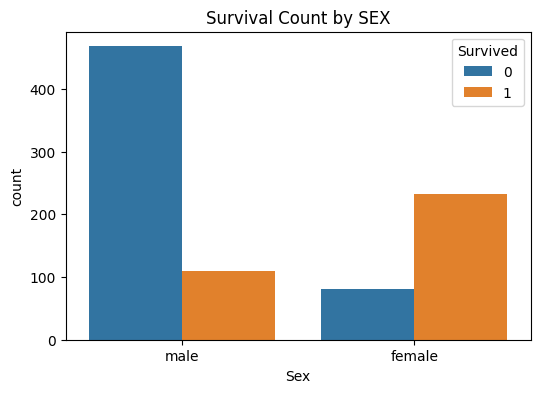

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 현재 경로 확인 (notebooks 폴더 안에서 실행되므로 상위 폴더로 나가야 함.)
print(f"Current working directory: {os.getcwd()}")

# 데이터 로드
train_path = "../data/train.csv"
test_path = "../data/test.csv"

try:
    df_train = pd.read_csv(train_path)
    df_test = pd.read_csv(test_path)
    print("데이터 로드 성공")
    print(f"Train Shape: {df_train.shape}")
    print(f"Test Shape: {df_test.shape}")
    
    # 간단한 시각화 (성별에 따른 생존율)
    # figsize는 바탕 크기를 정하는 코드이다. (6인치, 4인치)
    plt.figure(figsize=(6, 4))
    # 실제 .csv에 있는 컬럼명을 줘야 하므로 대소문자를 가려야 한다. -> x축 y축에 이름 넣어주는건줄 알았음..
    # data=df_train -> 사용할 데이터는 df_train이라는 데이터프레임을 명시
    sns.countplot(data=df_train, x="Sex", hue="Survived")
    plt.title("Survival Count by SEX")
    plt.show()
    
except FileNotFoundError:
    print("No File")

In [ ]:
# 결측치 개수 확인
print("Train Set 결측치: \n", df_train.isnull().sum())
print("-" * 20)
print("Test Set 결측치: \n", df_test.isnull().sum())

# 결측치 확인해 보면 나이같은 경우 결측치가 있긴 하지만 생존에 중요한 정보이므로 버리기 아깝끼 때문에 평균값이나 중간값을 넣어주면 된다.
# Cabin(객실 번호) 같은 경우 너무 많이 빠져있기도 하고 중요해보이지 않으므로 걍 버리는게 좋다.
# Embarked(탑승 항구)같은 경우 2개밖에 안 비어 있으니 아무거나(가장 많이 탄 항구)로 채우면 된다.

Train Set 결측치: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
Test Set 결측치: 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
# 결측치 Embarked를 채우기 위한 갯수 세기
print(df_train['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [13]:
# 1. 나이 채우기 (중간값 이용)
# fillna()함수는 NaN값을 괄호 안의 값으로 채워줌
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

# 2. Embarked 채우기: 가장 많이 나온 'S'항구로 채움 (하드코딩)
df_train['Embarked'] = df_train['Embarked'].fillna('S')

# 3. Cabin 버리기
# axis=1은 'Column'을 지운다는 뜻이다.
df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

print("결측치 처리 완료")
print(df_train.isnull().sum())

결측치 처리 완료
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [14]:
# 문자를 숫자로 변호나
# male -> 0, female -> 1
# Embarked: S->0, C->1, Q->2

# 1. 성별(Sex) 변환
sex_mapping = {'male': 0, 'female': 1}
df_train['Sex'] = df_train['Sex'].map(sex_mapping)
df_test['Sex'] = df_test['Sex'].map(sex_mapping)

# 2. 탑승항구(Embarked) 변환
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
df_train['Embarked'] = df_train['Embarked'].map(embarked_mapping)
df_test['Embarked'] = df_test['Embarked'].map(embarked_mapping)

# 결과 확인
print(df_train[['Sex', 'Embarked']].head())

   Sex  Embarked
0    0         0
1    1         1
2    1         0
3    1         0
4    0         0


In [15]:
# 불필요한 데이터 버리기
drop_cols = ['Name', 'Ticket']
df_train = df_train.drop(drop_cols, axis=1)
df_test = df_test.drop(drop_cols, axis=1)

print("최종 데이터 형태:", df_train.shape)
# 이제 모든 데이터가 숫자 형태임
df_train.head()

최종 데이터 형태: (891, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [18]:
# 1. 학습용 데이터 준비 (PassengerId는 학습에 필요 없으니 제거)
X_train = df_train.drop(['Survived', 'PassengerId'], axis=1)
y_train = df_train['Survived']

# 2. 테스트 데이터 준비(PassengerId 제거)
# 주의: 나중에 제출할 때 PassengerId가 필요하므로, 원본 df_test는 건드리지 않고 X_test만 따로 만든다.
X_test = df_test.drop(['PassengerId'], axis=1)

print(f"X_train shape: {X_train.shape}") # (891, 7) -> Survived, PassengerId빠짐
print(f"y_train shape: {y_train.shape}") # (891,)

X_train shape: (891, 7)
y_train shape: (891,)


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 1. 장치 연결 (M4 pro의 GPU 가속기: 'mps')
# 만약 mps 안 될 경우 cpu사용
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# 2. Pandas 데이터를 Numpy -> Tensor로 변환
# .values: DataFrame에는 인덱스와 컬럼명같은 메타데이터가 붙어있다. 이걸 떼고 순수한 숫자데이터만 뽑아온다.
# .values를 쓰면 값만 numpy 배열로 가져옴
X_train_np = X_train.values.astype(np.float32)

# .astype(np.float32)
# Pandas나 Python은 기본적으로 정밀도가 높은 'float64(Double)'를 쓴다.
# 하지만 딥러닝 GPU연산은 속도를 위해 'float32(Float)'를 표준으로 쓴다. 형 변환을 안 하면 에러가 나거나 느려짐.

# .reshape(-1, 1): 차원 맞춤
# y_train의 값은 그냥  [0, 1, 1, 0 ...] 처럼 1차원 배열이다.
# 하지만 행렬 곱셈을 하려면 (N행, 1열) 형태의 2차원 행렬이 되어야 한다.
# -1은 "개수는 알아서 맞춰라(Auto)", 1은 "1열로 세워라"는 뜻이다.
# 변환 전: [0, 1, 1] Shape: (3,)
# 변환 후: [[0], [1], [1]] Shape: (3, 1) -> 기둥처럼 세움
y_train_np = y_train.values.astype(np.float32).reshape(-1, 1)   #(N,)->(N, 1)로 차원 맞춤
X_test_np = X_test.values.astype(np.float32)

# 3. 텐서 생성 및 GPU로 이동
# torch.tensor(...): Numpy 배열을 PyTorch텐서 객체로 감쌈
# .to(device): 만든 텐서를 CPU메모리에서 GPU메모리로 복사
X_train_tensor = torch.tensor(X_train_np).to(device)
y_train_tensor = torch.tensor(y_train_np).to(device)
X_test_tensor = torch.tensor(X_test_np).to(device)

print("텐서 변환 완료!")
print(f"Input Shape: {X_train_tensor.shape}")


Using device: mps
텐서 변환 완료!
Input Shape: torch.Size([891, 7])


In [22]:
import torch.nn as nn
import torch.nn.functional as F

input_size = X_train_tensor.shape[1]

class TitanicNet(nn.Module):
    def __init__(self):
        super(TitanicNet, self).__init__()
        
        # 레이어 정의 (부붐 조립)
        # nn.Sequential은 여러 레이어를 순서대로 묶어주는 컨테이너이다.
        self.layers = nn.Sequential(
            # [입력층 -> 은닉층 1]
            # Linear: 행렬 곱셈 ( y = Wx + b)
            # 7개의 정보를 받아서 32개의 특징으로 뻥튀기
            nn.Linear(input_size, 32),
            nn.ReLU(),   # 활성화 함수 (비선형성 부여, 0보다 작으면 0, 크면 드대로)
            
            # [은닉층 1 -> 은긱층 2]
            # 32개 특징을 16개로 압축
            nn.Linear(32, 16),
            nn.ReLU(),
            
            # [은닉층 2 -> 은닉층 3]
            nn.Linear(16, 8),
            nn.ReLU(),
            
            # [은닉층 3 -> 출력층]
            # 마지막은 생존 확률 (0~1) 하나만 나와야 하므로 출력은 1개
            nn.Linear(8, 1),
            nn.Sigmoid()    # 결과를 0.0~1.0사이의 확률값으로 반환
        )
        
    def forward(self, x):
        # 데이터 흐름 정의 (순전파, Forward Propagation)
        # x가 들어오면 self.layers를 통과해서 반환됨
        return self.layers(x)
    
model = TitanicNet().to(device)

print("모델 설계 완료")
print(model)

모델 설계 완료
TitanicNet(
  (layers): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [23]:
import torch.optim as optim

# 학습률 (Learning Rate): 한 번에 얼마나 많이 수정할지 설정
learning_rate = 0.01

# 1. 손실함수
# Binary Cross Entropy Loss: 이진 분류 전용
criterion = nn.BCELoss()

# 2. 최적화 도구
# model.parameters(): 아까 만든 32개, 16개짜리 레이어들의 모든 가중치 목록
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print("학습 준비 완료")

학습 준비 완료


In [24]:
# 총 1000번 반복 학습
epochs = 1000

# Loss가 줄어드는 과정을 기록할 리스트
loss_history = []

# 모델을 학습 모드로 전환 (나중에 Dropout 등을 쓸 때 필요)
model.train()

print("학습 시작!!")

for epoch in range(epochs):
    # ----------------------------------------
    # 순전파 (Forward Pass): 예측
    # ----------------------------------------
    y_pred = model(X_train_tensor)
    
    # ----------------------------------------
    # 2. 오차 계산(Compute Loss): 채점
    # ----------------------------------------
    loss = criterion(y_pred, y_train_tensor)
    
    # ----------------------------------------
    # 3. 역전파(Backward Pass): 수정 방향 찾기
    # ----------------------------------------
    optimizer.zero_grad()   # 이전 루프에서 계산된 기울기 초기화 (안하면 누적됨)
    loss.backward()         # Loss를 미분해서 각 가중치가 얼마나 영향력 있는지 계산
    
    # ----------------------------------------
    # 4. 가중치 갱신(Update Weights): 실제 수정
    # ----------------------------------------
    optimizer.step()    # 계산된 기울기만큼 w를 빼줌 (경사하강)
    
    # ----------------------------------------
    # 로그 출력
    # ----------------------------------------
    loss_history.append(loss.item())
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch[{epoch+1}/{epochs}] | Loss: {loss.item():.4f}")
        
print("학습 종료")

학습 시작!!
Epoch[100/1000] | Loss: 0.4041
Epoch[200/1000] | Loss: 0.3965
Epoch[300/1000] | Loss: 0.3910
Epoch[400/1000] | Loss: 0.3487
Epoch[500/1000] | Loss: 0.3484
Epoch[600/1000] | Loss: 0.3285
Epoch[700/1000] | Loss: 0.3226
Epoch[800/1000] | Loss: 0.3167
Epoch[900/1000] | Loss: 0.3163
Epoch[1000/1000] | Loss: 0.3286
학습 종료
